# Introduction to SQL Server ML Services

## Prerequisites

Install SQL machine Learning services on the instance of SQL Server using setup:

[Install SQL Server Machine Learning Services on Windows - SQL Server Machine Learning Services | Microsoft Learn](https:\learn.microsoft.com\en-us\sql\machine-learning\install\sql-machine-learning-services-windows-install?view=sql-server-ver15#run-setup)

Restore AdventureWorks2019 example database

[AdventureWorks sample databases - SQL Server | Microsoft Learn](https:\learn.microsoft.com\en-us\sql\samples\adventureworks-install-configure?view=sql-server-ver16&tabs=ssms)

Create the Iris demo data for SQL ML

[Iris demo data set for tutorials - SQL machine learning | Microsoft Learn](https://learn.microsoft.com/en-us/sql/machine-learning/tutorials/demo-data-iris-in-sql?view=sql-server-ver16)  

Open in Azure Data Studio and connect to SQL Server 

[https://learn.microsoft.com/en-us/sql/machine-learning/tutorials/quickstart-python-create-script?view=sql-server-ver16](https:\learn.microsoft.com\en-us\sql\machine-learning\tutorials\quickstart-python-create-script?view=sql-server-ver16)

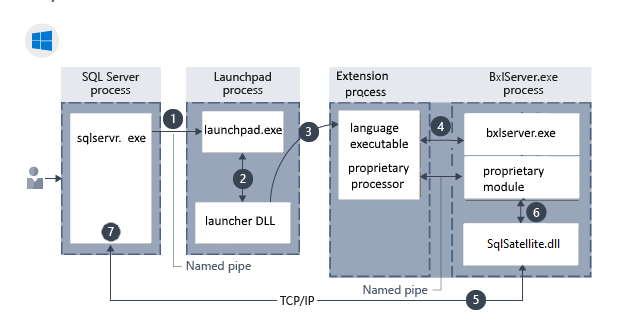

**Connect to SQL Server** 

**Ensure external scripts are enabled**

In [2]:
sp_configure 'external scripts enabled', 1
GO
reconfigure
GO

Configuration option 'external scripts enabled' changed from 1 to 1. Run the RECONFIGURE statement to install.

Commands completed successfully.

Total execution time: 00:00:00.003

**Pass the complete Python script to the `sp_execute_external_script` stored procedure.**

**The script is passed through the `@script` argument. Everything inside the `@script` argument must be valid Python code.**

In [3]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'
a = 1
b = 2
c = a/b
d = a*b
print(c, d)
'

STDOUT message(s) from external script: 
0.5 2

Total execution time: 00:00:00.329

To check which version of Python SQL Server ML is using

<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);"><b>A typical example script is one that just outputs the string "Hello World":</b></span>

In [4]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'
import sys
print(sys.version)
'
GO

STDOUT message(s) from external script: 
3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]

Total execution time: 00:00:00.297

In [5]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'OutputDataSet = InputDataSet'
    , @input_data_1 = N'SELECT 1 AS hello'
WITH RESULT SETS(([Hello World] INT));
GO

(1 row affected)

Total execution time: 00:00:00.346

Hello World
1


**<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Retrieve the data from the table using the&nbsp;</span>  `SELECT`  <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;statement, passes it through the Python runtime, and returns the data as a data frame.&nbsp;</span>**  

**<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">The&nbsp;</span>  `WITH RESULT SETS`  <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;clause defines the schema of the returned data table for SQL, adding the column name&nbsp;</span>  _NewColName_<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">.</span>**

In [6]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'OutputDataSet = InputDataSet;'
    , @input_data_1 = N'SELECT TOP (10) [BusinessEntityID],[LastName] FROM [AdventureWorks2019].[Person].[Person] ORDER BY BusinessEntityID DESC;'
WITH RESULT SETS(([EntityID] INT NOT NULL, [LastName] NVARCHAR(5) NOT NULL));

(10 rows affected)

Total execution time: 00:00:00.330

EntityID,LastName
20777,Hu
20776,Zheng
20775,He
20774,Richa
20773,Guo
20772,Liang
20771,Baile
20770,Gao
20769,Zhu
20768,Murph


**To list which Python packages are installed:**

In [8]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'
import pkg_resources
import pandas
dists = [str(d) for d in pkg_resources.working_set]
OutputDataSet = pandas.DataFrame(dists)
'
WITH RESULT SETS(([Package] NVARCHAR(max)))
GO

(168 rows affected)

Total execution time: 00:00:02.286

Package
zipp 0.6.0
zict 1.0.0
xlwt 1.3.0
XlsxWriter 1.1.2
xlrd 1.2.0
wrapt 1.11.2
wincertstore 0.2
win-unicode-console 0.5
win-inet-pton 1.0.1
widgetsnbextension 3.4.2


<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Change the names of the input and output variables. The default input and output variable names are&nbsp;</span> <span style="box-sizing: inherit; outline-color: inherit; font-weight: 600; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">InputDataSet</span> <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;and&nbsp;</span> <span style="box-sizing: inherit; outline-color: inherit; font-weight: 600; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">OutputDataSet</span><span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">, the following script changes the names to&nbsp;</span> <span style="box-sizing: inherit; outline-color: inherit; font-weight: 600; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">SQL_in</span> <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;and&nbsp;</span> <span style="box-sizing: inherit; outline-color: inherit; font-weight: 600; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">SQL_out</span><span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">:</span>

In [7]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'SQL_out = SQL_in;'
    , @input_data_1 = N'SELECT 12 as Col;'
    , @input_data_1_name  = N'SQL_in'
    , @output_data_1_name = N'SQL_out'
WITH RESULT SETS(([NewColName] INT NOT NULL));

(1 row affected)

Total execution time: 00:00:00.340

NewColName
12


<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Generate values just using the Python script with no input data (</span>`@input_data_1`  <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;is set to blank).</span>

<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Python uses the leading spaces to group statements so Python is not indented in this example:</span>

In [10]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'
import pandas as pd
mytextvariable = pandas.Series(["hello", " ", "world"]);
OutputDataSet = pd.DataFrame(mytextvariable);
'
    , @input_data_1 = N''
WITH RESULT SETS(([Col1] CHAR(20) NOT NULL));

(3 rows affected)

Total execution time: 00:00:00.378

Col1
hello
""
world


<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Output specific values from two series of math results in a data.frame, auto generated index starts at 0:</span>

In [11]:
EXECUTE sp_execute_external_script @language = N'Python'
    , @script = N'
import pandas as pd
a = 1
b = 2
c = a/b
d = a*b
s = pandas.Series([c,d])
print(s)
df = pd.DataFrame(s, index=[1])
OutputDataSet = df
'
WITH RESULT SETS((ResultValue FLOAT))

STDOUT message(s) from external script: 
0 0.5
1 2.0
dtype: float64

(1 row affected)

Total execution time: 00:00:00.314

ResultValue
2


<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Use system timing functions in the&nbsp;</span> `time` <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;package to measure the amount of time used by Python processes and analyze performance issues.</span>

In [12]:
EXECUTE sp_execute_external_script
      @language = N'Python'
    , @script = N'
import time
start_time = time.time()

# Run Python processes

elapsed_time = time.time() - start_time
'
    , @input_data_1 = N' ;';

Commands completed successfully.

Total execution time: 00:00:00.346

<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Create a stored procedure that generates a model for predicting outcomes.</span>

In [9]:
USE irissql
GO
DROP PROCEDURE IF EXISTS generate_iris_model; 
GO

CREATE PROCEDURE generate_iris_model (@trained_model VARBINARY(max) OUTPUT)
AS
BEGIN
    EXECUTE sp_execute_external_script @language = N'Python'
        , @script = N'
import pickle
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
trained_model = pickle.dumps(GNB.fit(iris_data[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]], iris_data[["SpeciesId"]].values.ravel()))
'
        , @input_data_1 = N'select "Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "SpeciesId" from iris_data'
        , @input_data_1_name = N'iris_data'
        , @params = N'@trained_model varbinary(max) OUTPUT'
        , @trained_model = @trained_model OUTPUT;
END;
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.001

<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Script deletes an existing model of the same name ("Naive Bayes") to make room for new ones created by rerunning the same procedure</span>

In [10]:
USE irissql
GO
DECLARE @model varbinary(max);
DECLARE @new_model_name varchar(50)
SET @new_model_name = 'Naive Bayes'
EXECUTE generate_iris_model @model OUTPUT;
DELETE iris_models WHERE model_name = @new_model_name;
INSERT INTO iris_models (model_name, model) values(@new_model_name, @model);
GO

Commands completed successfully.

(0 rows affected)

(1 row affected)

Total execution time: 00:00:03.368

<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Verify that the model was inserted into the iris_models table:</span>

In [11]:
USE irissql
GO
SELECT * FROM dbo.iris_models

Commands completed successfully.

(1 row affected)

Total execution time: 00:00:00.012

model_name,model
Naive Bayes,0x800363736B6C6561726E2E6E616976655F62617965730A476175737369616E4E420A7100298171017D71022858060000007072696F727371034E580D0000007661725F736D6F6F7468696E677104473E112E0BE826D6955808000000657073696C6F6E5F7105636E756D70792E636F72652E6D756C746961727261790A7363616C61720A7106636E756D70790A64747970650A71075802000000663871084B004B0187710952710A284B0358010000003C710B4E4E4E4AFFFFFFFF4AFFFFFFFF4B0074710C6243088DF8FE1415972A3E710D86710E52710F5808000000636C61737365735F7110636E756D70792E636F72652E6D756C746961727261790A5F7265636F6E7374727563740A7111636E756D70790A6E6461727261790A71124B008571134301627114877115527116284B014B0385711768075802000000693471184B004B0187711952711A284B03680B4E4E4E4AFFFFFFFF4AFFFFFFFF4B0074711B6289430C000000000100000002000000711C74711D62580600000074686574615F711E681168124B0085711F6814877120527121284B014B034B04867122680A8943609F1A2FDD24061440088195438B6C0B403208AC1C5A64F73FAD726891ED7CCF3F5839B4C876BE17402A5C8FC2F52806400AD7A3703D0A11409DEFA7C64B37F53F253108AC1C5A1A40976E1283C0CA07406891ED7C3F3516406891ED7C3F35004071237471246258060000007369676D615F7125681168124B008571266814877127527128284B014B034B04867129680A894360D60E20FBEC2BBF3F223906404206C23FC55AC8CAED439E3F950AC22A5A4A863F6D978990EDB5D03FD9EC5B6539B4B83F442213CCFEB2CB3F6FDBE427349FA33F0FE38823425CD93F76FBF803B117BA3FA50AD2FA8E1AD33F1241AFF7AEECB23F712A74712B62580C000000636C6173735F636F756E745F712C681168124B0085712D681487712E52712F284B014B03857130680A894318000000000000494000000000000049400000000000004940713174713262580C000000636C6173735F7072696F725F7133681168124B008571346814877135527136284B014B03857137680A894318555555555555D53F555555555555D53F555555555555D53F71387471396258100000005F736B6C6561726E5F76657273696F6E713A5806000000302E32302E32713B75622E


In [23]:
USE irissql
GO
DROP PROCEDURE IF EXISTS generate_iris_model; 
GO
CREATE PROCEDURE predict_species (@model VARCHAR(100))
AS
BEGIN
    DECLARE @nb_model VARBINARY(max) = (
            SELECT model
            FROM iris_models
            WHERE model_name = @model
            );

    EXECUTE sp_execute_external_script @language = N'Python'
        , @script = N'
import pickle
irismodel = pickle.loads(nb_model)
species_pred = irismodel.predict(iris_data[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]])
iris_data["PredictedSpecies"] = species_pred
OutputDataSet = iris_data[["id","SpeciesId","PredictedSpecies"]] 
print(OutputDataSet)
'
        , @input_data_1 = N'select id, "Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "SpeciesId" from iris_data'
        , @input_data_1_name = N'iris_data'
        , @params = N'@nb_model varbinary(max)'
        , @nb_model = @nb_model
    WITH RESULT SETS((
                "id" INT
              , "SpeciesId" INT
              , "SpeciesId.Predicted" INT
                ));
END;
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.002

Run the stored procedure giving the model name "<span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Naive Bayes"</span>

<span style="color:rgb(22, 22, 22);font-family:&quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif;font-size:16px;background-color:rgb(255, 255, 255);"><b>Results are 150 predictions about species using floral characteristics as inputs. For the majority of the observations, the predicted species matches the actual species.</b></span>

In [12]:
USE irissql
GO
EXECUTE predict_species 'Naive Bayes' --WITH RESULT SETS ( ("id" int, "SpeciesId" int, "SpeciesId.Predicted" int));
GO

Commands completed successfully.

STDOUT message(s) from external script: 
 id SpeciesId PredictedSpecies
0 1 0 0
1 2 0 0
2 3 0 0
3 4 0 0
4 5 0 0
5 6 0 0
6 7 0 0
7 8 0 0
8 9 0 0
9 10 0 0
10 11 0 0
11 12 0 0
12 13 0 0
13 14 0 0
14 15 0 0
15 16 0 0
16 17 0 0
17 18 0 0
18 19 0 0
19 20 0 0
20 21 0 0
21 22 0 0
22 23 0 0

STDOUT message(s) from external script: 
23 24 0 0
24 25 0 0
25 26 0 0
26 27 0 0
27 28 0 0
28 29 0 0
29 30 0 0
.. ... ... ...
120 121 2 2
121 122 2 2
122 123 2 2
123 124 2 2
124 125 2 2
125 126 2 2
126 127 2 2
127 128 2 2
128 129 2 2
129 130 2 2
130 131 2 2
131 132 2 2
132 133 2 2
133 134 2 1
134 135 2 2
135 136 2 2

STDOUT message(s) from external script: 
136 137 2 2
137 138 2 2
138 139 2 2
139 140 2 2
140 141 2 2
141 142 2 2
142 143 2 2
143 144 2 2
144 145 2 2
145 146 2 2
146 147 2 2
147 148 2 2
148 149 2 2
149 150 2 2

[150 rows x 3 columns]

(150 rows affected)

Total execution time: 00:00:03.273

id,SpeciesId,SpeciesId.Predicted
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0
